In [1]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9cd620cd-c044-4da1-aa74-7656bd38b68b___R.S_HL 8335 copy 3_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d205e36-c1d6-40d6-93b8-ebd1c732ff00___R.S_HL 8085 copy 2.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d205e36-c1d6-40d6-93b8-ebd1c732ff00___R.S_HL 8085 copy 2_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d47547e-512f-49d0-9589-081a50333382___R.S_HL 7985 copy_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d7fe0ec-48b6-4b1e-83ea-391d53de37af___R.S_HL 8210 copy 3.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d7fe0ec-48b6-4b1e-83ea-391d53de37af___R.S_HL 8210 copy 3_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Co

In [2]:


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # for data agmuntation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt



In [3]:
# Define paths for training and validation
train_dir = "/content/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/New Plant Diseases Dataset(Augmented)/valid"

# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


In [4]:
# Define test directory
test_dir = "/content/New Plant Diseases Dataset(Augmented)/test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(128, 128))  # Resize images to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert to NumPy array
print(f"Loaded {len(test_images)} test images.")

Loaded 33 test images.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    batch_size=128,
    epochs=3,
)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


579/579 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.5708 - loss: 1.2436 - val_accuracy: 0.8936 - val_loss: 0.3151
Epoch 2/3
579/579 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8699 - loss: 0.3792 - val_accuracy: 0.8789 - val_loss: 0.3526
Epoch 3/3
579/579 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.9085 - loss: 0.2684 - val_accuracy: 0.9520 - val_loss: 0.1346


In [7]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9514 - loss: 0.1425
Validation Loss: 0.13462898135185242
Validation Accuracy: 0.9520103931427002


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


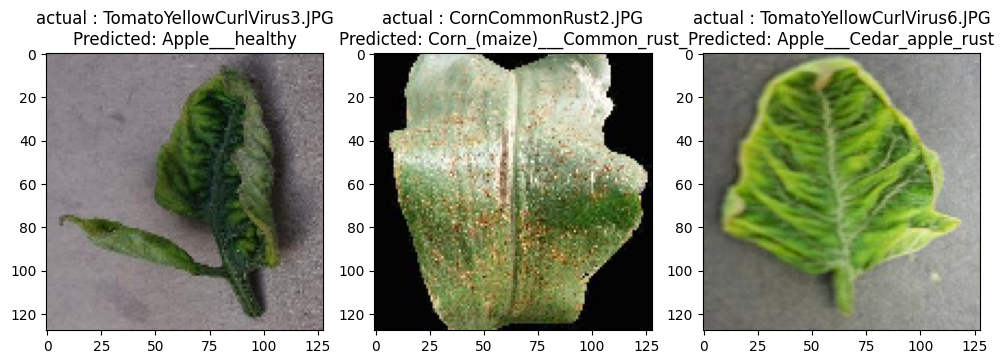

In [8]:
predictions = model.predict(test_images)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Map indices to class labels
class_labels = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(test_images[i])
    filename = os.path.basename(test_image_paths[i])
    label = class_labels[predicted_classes[i]]
    plt.title(f"actual : {filename}\nPredicted: {label}")
plt.tight_layout()
plt.show()